## [Practice 8] Polyp Segmentation
* 0. 실습 환경 설정
* 1. 데이터 준비하기
* 2. Training
* 3. Testing
* 4. Inference

### 0. 실습 환경 설정
* 가상환경명 : roadseg
* Python 버전 : python 3.7
* 설치 목록
    * !pip3 install --upgrade --no-cache-dir gdown
    * !pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 -f https://download.pytorch.org/whl/torch_stable.html
    * !pip install -r requirements.txt
    * albumentations
        * !pip uninstall albumentations
        * !pip install albumentations==0.5.1

* Unet++ Git 주소: https://github.com/4uiiurz1/pytorch-nested-unet

In [ ]:
#!git clone https://github.com/4uiiurz1/pytorch-nested-unet

### 1. 데이터 준비하기

### 1-1. 데이터셋 다운로드
* TODO : 데이터셋 다운로드 [링크](https://www.kaggle.com/datasets/debeshjha1/kvasirseg)
* TODO : 다운로드한 데이터셋 중, `images`와 `masks` 폴더를 {pytorch-nested-unet root}/inputs/polyp 에 넣어주기

* TODO : 경로 이동 (pytorch-nested-unet root로 이동)

In [ ]:
cd

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

DATA_DIR = './inputs/polyp/'

image_dir = os.path.join(DATA_DIR, 'images')
mask_dir = os.path.join(DATA_DIR, 'masks/0')

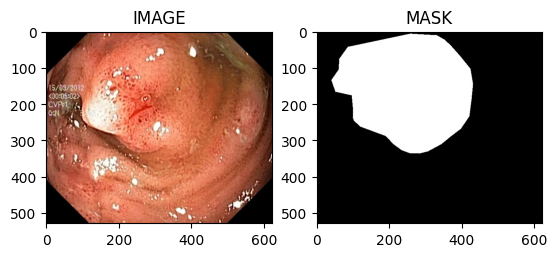

In [3]:
img = cv2.imread(os.path.join(image_dir, os.listdir(image_dir)[0]))
mask = cv2.imread(os.path.join(mask_dir, os.listdir(mask_dir)[0]))

plt.subplot(1,2,1)
plt.title('IMAGE')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(1,2,2)
plt.title('MASK')
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))

### 2. Training

* dataset_path='./inputs/polyp'
* name = None
* epochs = 300
* batch_size = 8
* arch = 'NestedUNet'
* deep_supervision = False
* input_channels = 3
* num_classes = 1
* input_w = 384
* input_h = 384
* loss = 'BCEDiceLoss'
* dataset = 'polyp'
* img_ext = '.jpg'
* mask_ext = '.jpg'
* optimizer = 'Adam'
* learning_rate = 1e-4
* momentum = 0.9
* weight_decay = 1e-4
* nesterov = False
* scheduler = 'CosineAnnealingLR'
* min_lr = '1e-5'
* factor = 0.1
* patience = 2
* milestones = '1,2'
* gamma = 2/3
* early_stopping = -1
* num_workers = 4

* TODO : 경로 이동 (pytorch-nested-unet root로 이동)

In [ ]:
cd

* TODO : --dataset에는 polyp,  --name에 polyp_segmentation 넣기

In [5]:
!python train.py --dataset polyp --arch NestedUNet --name polyp_segmentation --epochs 150 --batch_size 8 --input_w 384 --input_h 384 --img_ext jpg --mask_ext jpg --optimizer Adam 

^C


### 3. Testing

* TODO : 경로 이동 (pytorch-nested-unet root로 이동)

In [ ]:
cd

* TODO : --name에 polyp_segmentation 넣기

In [ ]:
!python val.py --name polyp_segmentation

### 4. Inference

* TODO : 경로 이동 (pytorch-nested-unet root로 이동)

In [ ]:
cd

In [ ]:
from PIL import Image
import numpy as np
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import torch
import archs
import yaml
from torchsummary import summary

* TODO : `best_model`에 학습한 가중치 넣기

In [10]:
best_model = 
yml_path = 'models/polyp_segmentation/config.yml'

In [11]:
with open(yml_path) as f:
    data = yaml.load(f, Loader=yaml.FullLoader)
print(data)

{'arch': 'NestedUNet', 'batch_size': 8, 'dataset': 'polyp', 'deep_supervision': False, 'early_stopping': -1, 'epochs': 300, 'factor': 0.1, 'gamma': 0.6666666666666666, 'img_ext': '.jpg', 'input_channels': 3, 'input_h': 384, 'input_w': 384, 'loss': 'BCEDiceLoss', 'lr': 0.001, 'mask_ext': '.jpg', 'milestones': '1,2', 'min_lr': 1e-05, 'momentum': 0.9, 'name': 'polyp_NestedUNet_woDS', 'nesterov': False, 'num_classes': 1, 'num_workers': 4, 'optimizer': 'SGD', 'patience': 2, 'scheduler': 'CosineAnnealingLR', 'weight_decay': 0.0001}


In [12]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model = archs2.__dict__[data['arch']](data['num_classes'],data['input_channels'],data['deep_supervision'])
model = model.to(DEVICE)
model.load_state_dict(torch.load(best_model, map_location=DEVICE))
print("model loaded")

model loaded


* TODO : 경로 지정
    * `test_folder` : 테스트 할 rgb 이미지 폴더 경로
    * `gt_folder` : 테스트 할 이미지의 groundtruth mask 폴더 경로
    * `result_folder` : 결과 저장할 폴더 경로

In [13]:
test_folder = 
gt_folder = 
result_folder = 

if not os.path.exists(result_folder):
    os.makedirs(result_folder)

test_file_list = os.listdir(test_folder)

In [14]:
def blend_images(ori, pred):
    ori = cv2.cvtColor(ori, cv2.COLOR_BGR2RGB)
    output = Image.fromarray(pred)
    background = Image.fromarray(ori).convert('RGBA')
    output = output.resize((ori.shape[1], ori.shape[0])).convert('RGBA')
    output_final = Image.blend(background, output, alpha=0.5)
    return cv2.cvtColor(np.array(output_final), cv2.COLOR_BGR2RGB)

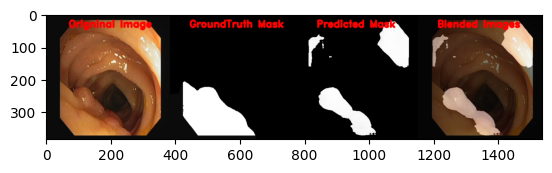

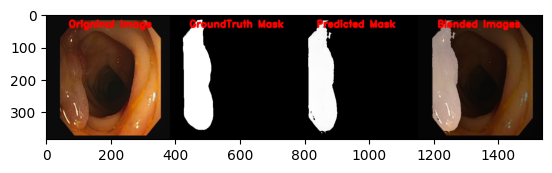

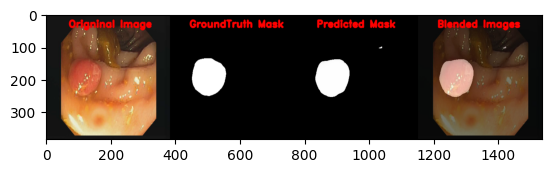

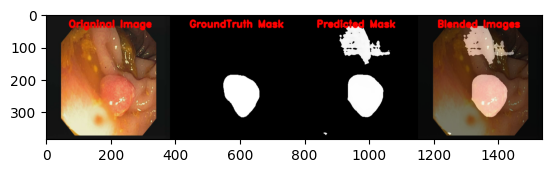

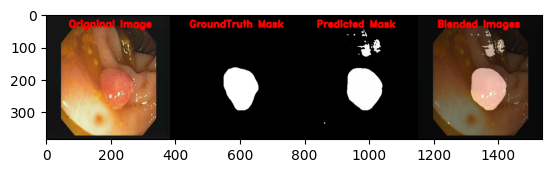

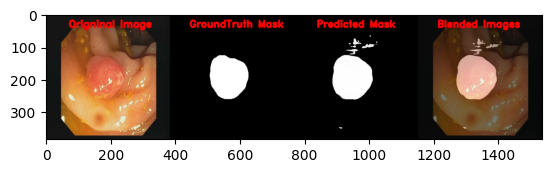

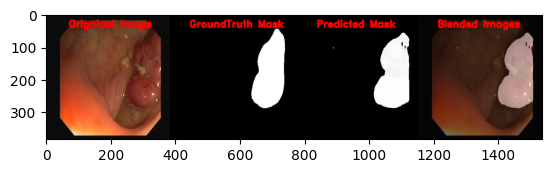

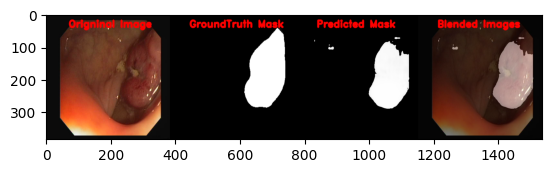

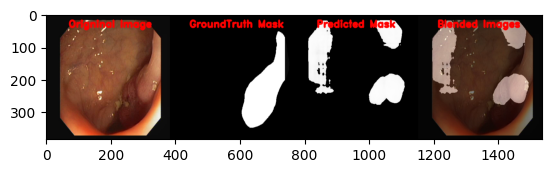

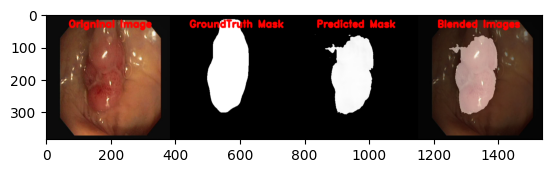

In [15]:
for idx, file in enumerate(test_file_list):
    black = np.zeros(shape=(384,384*4,3), dtype=np.uint8)
    gt = cv2.imread(os.path.join(gt_folder, file))
    gt = cv2.resize(gt, (384,384))
    
    img = cv2.imread(os.path.join(test_folder, file))
    img = cv2.resize(img, (384,384))
    input = img.astype('float32') / 255
    input = np.expand_dims(input, axis=0)
    input = torch.from_numpy(input).to(DEVICE)
    input = input.permute(0,3,1,2)
    output = model(input)
    output = torch.sigmoid(output)
    output = output.permute(0,2,3,1).cpu().detach()
    pred = np.array(output[0])*255
    pred = np.where(pred<240, 0, pred)
    pred_ = np.repeat(pred, 3, -1).astype(np.uint8)
    output_final = blend_images(img, pred_)[:,:,:3]
    
    cv2.putText(img, "Origninal Image", (70,40),cv2.FONT_HERSHEY_DUPLEX, 1,(0,0,255), thickness=3, lineType=cv2.LINE_AA)
    cv2.putText(gt, "GroundTruth Mask", (60,40),cv2.FONT_HERSHEY_DUPLEX, 1,(0,0,255), thickness=3, lineType=cv2.LINE_AA)
    cv2.putText(pred_, "Predicted Mask", (70,40),cv2.FONT_HERSHEY_DUPLEX, 1,(0,0,255), thickness=3, lineType=cv2.LINE_AA)
    cv2.putText(output_final, "Blended Images", (60,40),cv2.FONT_HERSHEY_DUPLEX, 1,(0,0,255), thickness=3, lineType=cv2.LINE_AA)
    
    black[:,:384,:] = img[:,:,:]
    black[:,384:384*2,:] = gt[:,:,:]
    black[:,384*2:384*3,:] = pred_[:,:,:]
    black[:,384*3:384*4,:] = output_final[:,:,::]

    cv2.imwrite(os.path.join(result_folder, file), black)
    
    
    if idx <10:
        plt.imshow(cv2.cvtColor(black, cv2.COLOR_BGR2RGB))
        plt.show()
    
    if idx == 99:
        break
